<a href="https://colab.research.google.com/github/00hamza00/CE888-Data-Science-and-Decision-Making/blob/master/Project_2/Assignment%202/project2_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [50]:
#read the data
df = pd.read_csv("/content/drive/My Drive/DataSets/data.csv")
#df = pd.read_csv("/content/drive/My Drive/DataSets/Ecoli2.csv")
#df = pd.read_csv("/content/drive/My Drive/DataSets/Yeast.csv")
df


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [51]:
#split and store all features except diagnosis(i.e. the target class)
x = df.drop(['diagnosis'],axis=1)
#x = df.drop(['class'],axis=1)
x = x.iloc[:,:-1]
x = x.iloc[:,1:31]

print(x)


     radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]


In [52]:
y = df['diagnosis']
y = y.replace(to_replace ="B",value=0)#"B_Type is replaced by value 0"
y = y.replace(to_replace ="M",value=1)#"M_type is replaced by value 1"

y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [53]:
print('number of 1-->',len(y[y==1]))
print("number of 0-->",len(y[y==0]))

number of 1--> 212
number of 0--> 357


In [0]:
#splitting data into training and testing data
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.15,random_state=22)

In [55]:
#Training and Fitting a decision tree for the baseline model 
from sklearn.metrics import f1_score,accuracy_score
dt_clf = DecisionTreeClassifier(min_samples_split=10)
dt_clf.fit(x_tr, y_tr)
pred_clf = dt_clf.predict(x_te) 
#performing cross validation for 10-folds
scores = cross_val_score(dt_clf, x,y , cv=10)


#print(scores)

print("f1 Score: ",f1_score(pred_clf,y_te))

print("The mean of the 10 Fold cross val is: ",np.mean(scores))

print("The std of the 10 Fold cross val is: ",np.std(scores))

f1 Score:  0.9180327868852458
The mean of the 10 Fold cross val is:  0.9051691729323308
The std of the 10 Fold cross val is:  0.030460424981085355


In [56]:
#Training and Fitting a random forest for the baseline model 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score
rd_clf = RandomForestClassifier(oob_score = False,  n_estimators= 100)
rd_clf.fit(x_tr, y_tr)
pred_clf = rd_clf.predict(x_te)
rd_scores = cross_val_score(rd_clf, x,y , cv=10)

#print(rd_scores)

print("f1 Score: ",f1_score(pred_clf,y_te))

print("The mean of the 10 Fold cross val is: ",np.mean(rd_scores))

print("The std of the 10 Fold cross val is: ",np.std(rd_scores))

f1 Score:  0.9180327868852458
The mean of the 10 Fold cross val is:  0.9578634085213033
The std of the 10 Fold cross val is:  0.03251549195831655


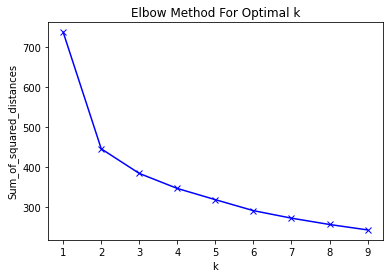

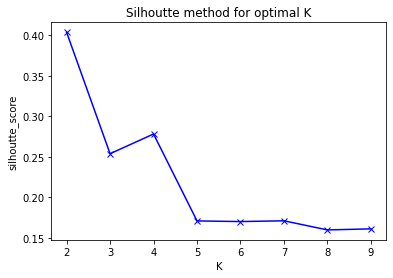

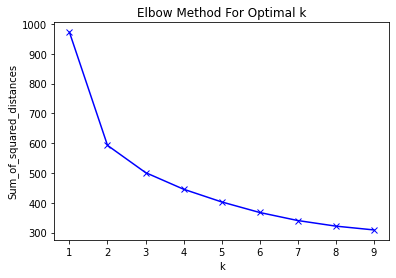

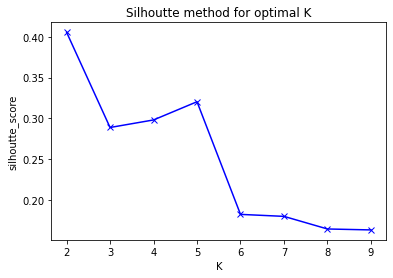

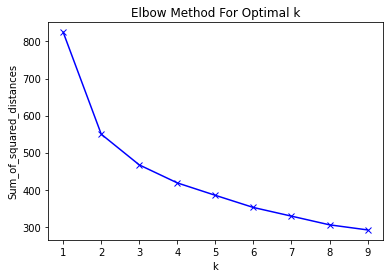

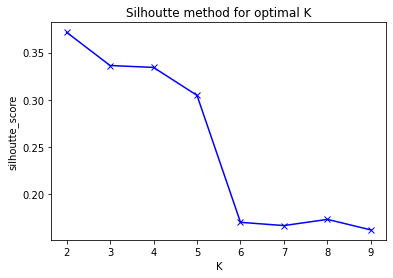

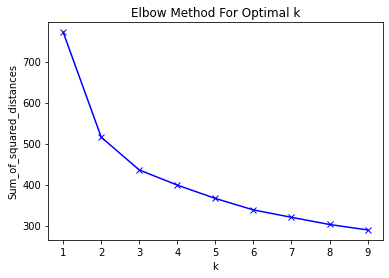

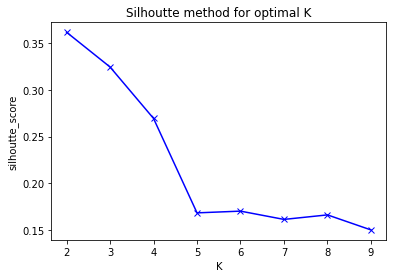

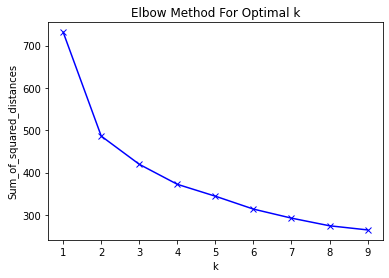

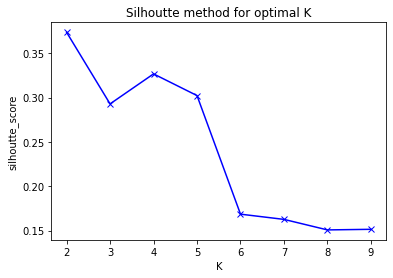

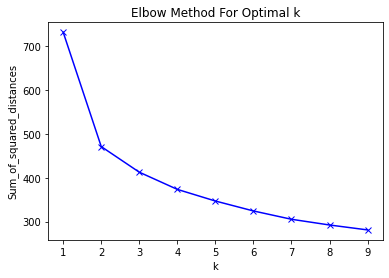

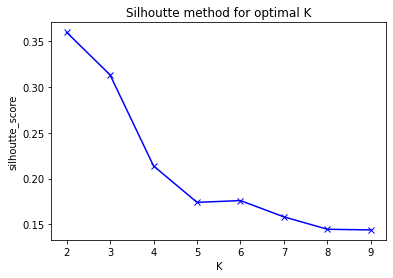

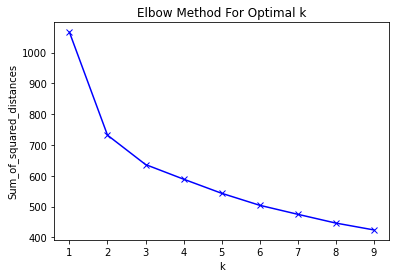

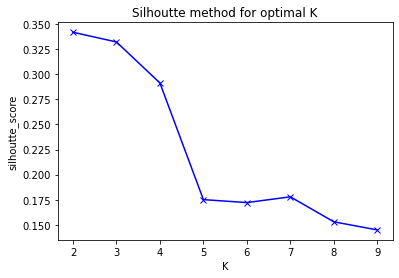

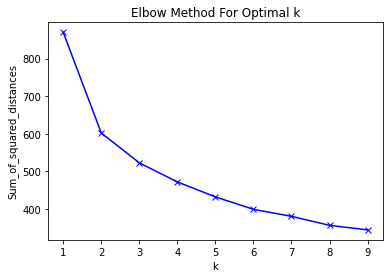

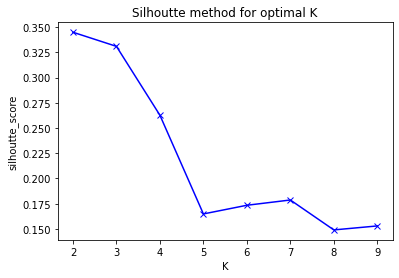

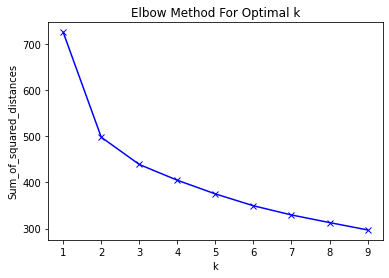

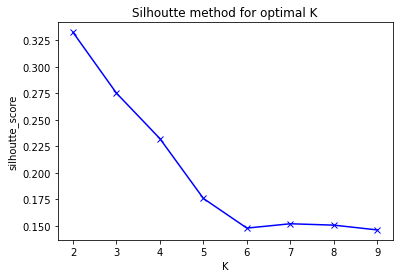

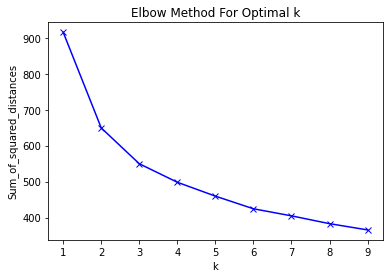

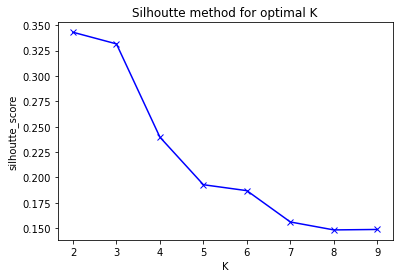

In [57]:

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
skf = StratifiedKFold(n_splits=10)
X_test_bin=[]
X_train_bin=[]
Y_train_bin=[]
Y_test_bin=[]
i = 0
# summerising the distributions after split into 10 bins
for train_index,test_index in skf.split(x,y):   #doing the k fold stratfied split for 10 bins
  
  X_train,X_test = x.iloc[train_index], x.iloc[test_index]
  Y_train,Y_test = y.iloc[train_index], y.iloc[test_index]

  

  mms = MinMaxScaler()    # scaling the data samples
  data_transformed= mms.fit_transform(X_train)
  data_transformed_test= mms.fit_transform(X_test)

  data_transformed= mms.transform(X_train)
  

  # saving the data values which will be used further
  X_test_bin.insert(i,data_transformed_test)
  X_train_bin.insert(i,data_transformed)
  Y_train_bin.insert(i,Y_train)
  Y_test_bin.insert(i,Y_test)
  i+=1


  #Elbow method
  Sum_of_squared_distances = []
  K = range(1,10)
  for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    squared_Sum = Sum_of_squared_distances.append(km.inertia_)


#silhoutte method
  sil = []
  K_sil = range(2,10)

  for Ks in K_sil:
    kmeans = KMeans(n_clusters = Ks)
    kmeans = kmeans.fit(data_transformed)
    labels = kmeans.labels_
    sil.append(silhouette_score(data_transformed,labels,metric = 'euclidean'))
  plt.figure()
  #graph for elbow method
  plt.plot(K, Sum_of_squared_distances, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Sum_of_squared_distances')
  plt.title('Elbow Method For Optimal k')
  plt.show()

  #graph for silhoutte
  plt.figure()
  plt.plot(K_sil,sil,'bx-')
  plt.xlabel('K')
  plt.ylabel('silhoutte_score')
  plt.title('Silhoutte method for optimal K')
  plt.show()





In [0]:
k=[2,5,4,3,4,2,3,3,3,3]  # the optimal K values array being made after looking at the graphs and noting them down

In [59]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import f1_score,accuracy_score

#declaring the varibales

CLUSTER_X_TEST={}
result={}
test_label = {}
temp={}
kfold_f1=[]
for i in  range(len(k)):
  Final_result = {}

  #passing the cluster value to the k means from the array we made for Optimal K value
  km = KMeans(n_clusters=k[i])
 
 # using the data we saved earlier so we can get different combination of the split each time 
  Y_train = Y_train_bin[i]
  km = km.fit(X_train_bin[i])
  data_transformed = X_train_bin[i]
  
  
  #making array and saving the cluster value and the labels

  temp_rf={}
  for l in range(k[i]*2):
    temp_rf[l]=np.array([])
  for cluster,xtrain,labels in zip(km.labels_,data_transformed,Y_train):
    for m in range(k[i]):
        if(cluster==m):
          temp_rf[m*2] = np.append(temp_rf[m*2],xtrain)   # sepereating the clusters and their labels in the list
          temp_rf[(m*2)+1] = np.append(temp_rf[(m*2)+1] ,labels)

  # saving the speciic cluster train and labels in an array on respective indexes      
  cluster_train ={}
  cluster_label ={}

  #getting the specific cluster traning data and their respective labels
  for n in range(len(temp_rf)//2):
    cluster_train[n] = np.array(temp_rf[n*2])
    
    cluster_label[n] = temp_rf[(n*2)+1]
    
    #reshaping the array so its the proper format
    cluster_train[n] = np.reshape(cluster_train[n],(-1,30))
    #cluster_train[n] = np.reshape(cluster_train[n],(-1,7)) used when different dataset is being used
    
  # training the classifier on the respective clusters
  rd_clf ={}
  for b in range(k[i]):
    rd_clf[b]=RandomForestClassifier(random_state=22, n_estimators= 100)
    rd_clf[b].fit(cluster_train[b],cluster_label[b])
 
 
  # assigning the test bin data to the respective cluster
  for v in range(len(k)):
    CLUSTER_X_TEST[v] = km.predict(X_test_bin[v])

#making empty arrays for saving the test cluster adata and the test labels
  for p in range(k[i]):
        temp[p]=np.array([])

  for r in range(k[i]):
    test_label[r]=np.array([])

  for test_cluster,test_cluster_data,true_labels in zip(CLUSTER_X_TEST[i],X_test_bin[i],Y_test_bin[i]):

    for c in range(k[i]):
      if(test_cluster==c ): 
        
          temp[c] = np.append(temp[c] ,test_cluster_data)  # getting the cluster number data unique to its
          test_label[c] = np.append(test_label[c],true_labels)  # getting the coreesiponding label to that data
     
     
      #using the repective classifeir trained for each cluster to predict the labels for the test bin   
  for t in range(k[i]):
    if temp[t]!=[]:
      temp[t] = np.reshape(temp[t],(-1,30))
      result[t]= rd_clf[t].predict(temp[t])
  
  t_temp=[]
  res_temp=[]
  
  for q in range(k[i]):
    
    if test_label[q]!=[]:
      t_temp=t_temp+list(test_label[q])
      res_temp=res_temp+list( result[q])
      Final_result[q] = f1_score(test_label[q], result[q], average='micro')
      
  #getting the  k fold f1 score for the iterations
  kfold_f1.append(f1_score(t_temp, res_temp, average='micro'))
 
  print(Final_result)
  print("-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
 


{0: 1.0, 1: 0.9500000000000001}
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
{0: 0.8571428571428571, 1: 0.9393939393939394, 2: 1.0, 3: 1.0}
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
{0: 1.0, 1: 1.0, 2: 0.8947368421052632}
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
{0: 1.0, 1: 0.875, 2: 0.9210526315789473}
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
{0: 1.0, 1: 1.0, 3: 1.0}
------------------------------------------------------------------------------

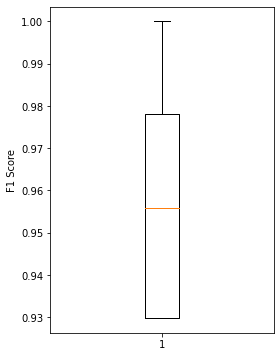

Mean Value of the 10 iterations:  0.9560776942355889
Std of the 10 Iterations:  0.025097798045085388


In [60]:
kfold_f1
# Create a figure instance
plt.figure(figsize=(4, 6))
plt.ylabel("F1 Score")

plt.boxplot(kfold_f1)
plt.show()
#print(kfold_f1)
print("Mean Value of the 10 iterations: ",np.mean(kfold_f1))
print("Std of the 10 Iterations: ", np.std(kfold_f1))
